In [1]:
import numpy as np
import matplotlib.pyplot as plt

Select one of the following methods–
a. Linear spline
b. Quadratic spline
c. Natural cubic spline
d. Not-a-knot cubic spline
e. Periodic cubic spline
f. Clamped cubic spine 

In [2]:
def linear(input_data, n, m, eval_data):
    ans = np.zeros(m)
    for j in range(0, m):
        for i in range(1, n):
            if(eval_data[j]<input_data[i][0]):
                ans[j] = input_data[i-1][1] + (eval_data[j] - input_data[i-1][0])*(input_data[i][1] - input_data[i-1][1])/(input_data[i][0] - input_data[i-1][0])
                break;
    for j in range(0, m):
        print(str(eval_data[j]) + "\t" + str(ans[j]))
    plt.title("Linear Spline")
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.plot(input_data[:,0], input_data[:,1], color = "red")
    plt.show()

In [3]:
def quadratic(input_data, n, m, eval_data):
    A = np.zeros([3*(n-1), 3*(n-1)])
    B = np.zeros(3*(n-1))
    ans = np.zeros(m)
    for i in range(0,n-1):
        A[2*i][3*i] = input_data[i][0]**2
        A[2*i][(3*i)+1] = input_data[i][0]
        A[2*i][(3*i)+2] = 1
        B[2*i] = input_data[i][1]
        A[(2*i)+1][3*i] = input_data[i+1][0]**2
        A[(2*i)+1][3*i] = input_data[i+1][0]
        A[(2*i)+1][3*i] = 1
        B[(2*i)+1] = input_data[i+1][1]
    for i in range(0,n-2):
        A[2*(n-1)+i][3*i] = input_data[i+1][0]*2
        A[2*(n-1)+i][3*i+1] = 1
        A[2*(n-1)+i][3*(i+1)] = input_data[i+1][0]*(-2)
        A[2*(n-1)+i][3*(i+1)+1] = -1
    A[3*(n-1)-1][0] = 1
    x = np.linalg.lstsq(A, B, rcond = None)
    for j in range(0,m):
        for i in range(1, n):
            if(eval_data[j]<input_data[i][0]):
                a = x[3*i-3]
                b = x[3*i-2]
                c = x[3*i-1]
                x_ = eval_data[j]
                ans[j] = [a*(np.square(x_)) + b*x_ + c]
                break;
    for j in range(0, m):
        print(str(eval_data[j]) + "\t" + str(ans[j]))

In [4]:
n = int(input("Enter the number of data points: "))
input_data = np.zeros([n,2])
print("Enter the %d data points below: " % n)
for i in range(0,n):
    input_data[i][0] = float(input('Value of x: '))
    input_data[i][1] = float(input('Function Value at this point: '))
m = int(input("Enter the number of points interpolated values are to be found at: "))
eval_data = np.zeros(m)
for i in range(0,m):
    eval_data[i] = float(input('Value of x: '))

Enter the letter corresponding to any one of the methods mentioned abovel
Enter the number of data points: 5
Enter the 5 data points below: 
Value of x: -1
Function Value at this point: 0.0385
Value of x: -0.5
Function Value at this point: 0.1379
Value of x: 0
Function Value at this point: 1
Value of x: 0.5
Function Value at this point: 0.1379
Value of x: 1
Function Value at this point: 0.0385
Enter the number of points interpolated values are to be found at: 4
Value of x: -0.8
Value of x: -0.2
Value of x: 0.2
Value of x: 0.8


-0.8	0.07826
-0.2	0.65516
0.2	0.65516
0.8	0.07826


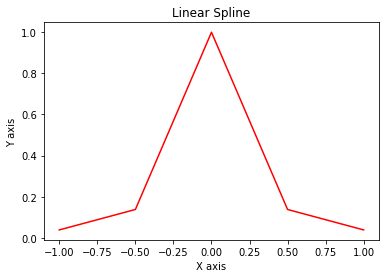

ValueError: operands could not be broadcast together with shapes (12,) (0,) 

In [5]:
linear(input_data, n, m, eval_data)
quadratic(input_data, n, m, eval_data)